In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


The type of this input is <class 'numpy.ndarray'>
Shape: (500, 500, 3)


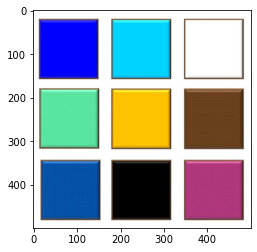

In [3]:
image = cv2.imread ('C:\\Users\\HP\\Downloads\\color.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

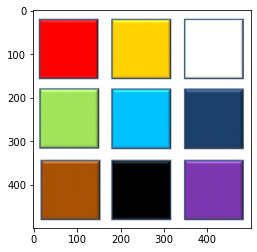

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

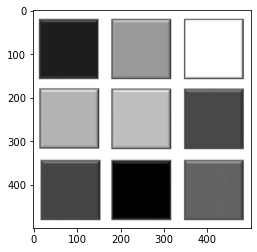

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

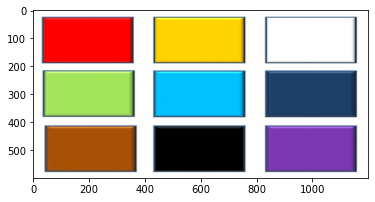

In [6]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
def  get_colors(image,number_of_colors,show_chart):
     modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
     modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
     clf = KMeans(n_clusters = number_of_colors)
     labels = clf.fit_predict(modified_image)
     counts = Counter(labels)

     center_colors = clf.cluster_centers_
     # We get ordered colors by iterating through the keys
     ordered_colors = [center_colors[i] for i in counts.keys()]
     hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
     rgb_colors = [ordered_colors[i] for i in counts.keys()]

     if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

        return rgb_colors

[array([120.95655527,  66.57773779, 170.31413882]),
 array([252.77077723, 253.26569353, 253.3737648 ]),
 array([1.95560984, 2.63218733, 3.44282905]),
 array([162.2920434 , 220.62610361, 101.28209765]),
 array([  2.98371492, 192.96833123, 251.55237065]),
 array([ 41.48414643,  69.38798011, 100.79408374]),
 array([252.70516313, 209.47932934,   3.72610617]),
 array([208.29236212,  42.83532898,   5.94902032])]

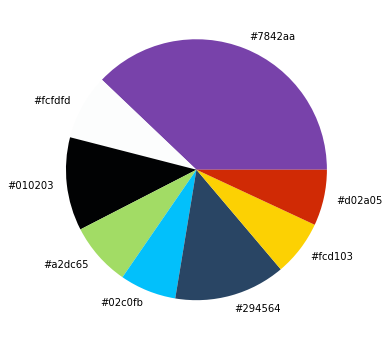

In [10]:
get_colors(get_image('C:\\Users\\HP\\Downloads\\color.jpg'), 8, True)